# Objective
Basic clustering and analysis for an SNR test image with the following properties:

- Number of spots: 100
- Spot shape: 2D Gaussian (sigma = 1.75 pixels)
- SNR distribution: Gaussian (mu = 20, sigma = 2.5)
- Background image: MAX_C3-ISP_300_1.tif (cells)
- Spot image generated 20180719
- Sent for annotation 20180719
- Annotations received 20180720

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation
import math
worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = True
img_height = 300
json_filename = 'SynthData_cells.json'
gen_date = '20180719'
bg_type = 'cells'
img_name = 'MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr20_2.5'
img_filename = img_name+'spot_img.png'
img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename

ba = QuantiusAnnotation(json_filepath)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()
anno_one_snr = ba.slice_by_image(anno_all, img_filename)

In [2]:
show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None

#sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

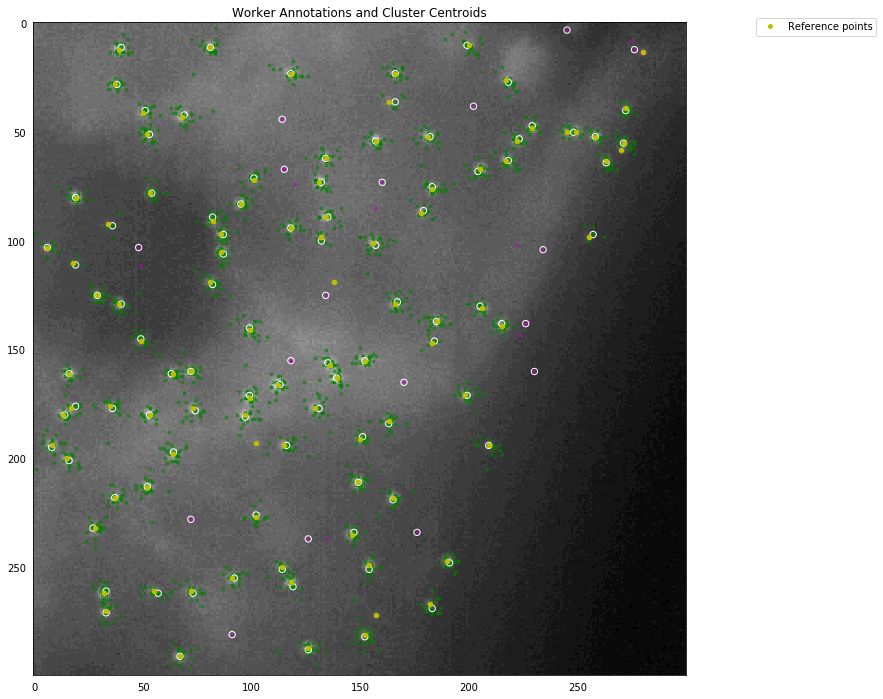

In [3]:
show_ref_points = True
show_correctness_workers = True
correctness_threshold = 4

clusters = sa.plot_annotations(anno_all, img_filename, img_filepath, csv_filepath, worker_marker_size, cluster_marker_size, show_ref_points, show_workers, show_clusters, show_correctness_workers, show_correctness_clusters, show_NN_inc, correctness_threshold, clustering_params, bigger_window_size)

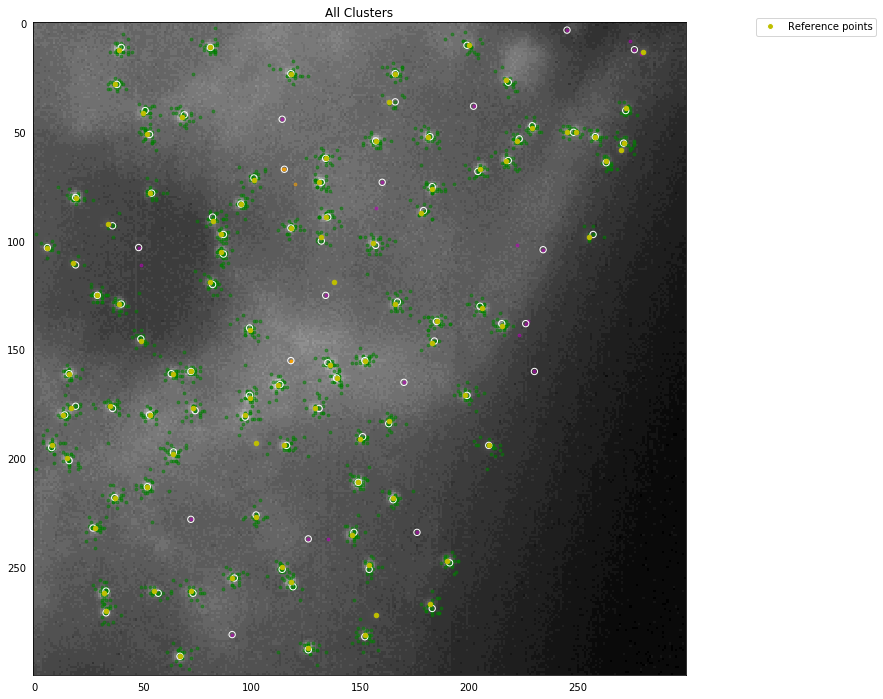

In [4]:
plot_title = "All Clusters"
show_possible_clumps = True
sa.plot_clusters(clusters, img_filename, img_filepath, img_height, csv_filepath, worker_marker_size, cluster_marker_size, correctness_threshold, show_possible_clumps, bigger_window_size, plot_title)

In [5]:
# threshold = sa.get_cluster_size_threshold(clusters)
# threshold = math.ceil(threshold)
# print(threshold)

In [6]:
# small_clusters, large_clusters = sa.sort_clusters_by_size_input_threshold(clusters, threshold)
# large_clusters.head()

In [7]:
# plot_title = "Min Unique Annotators/Cluster = " + str(threshold)
# sa.plot_clusters(large_clusters, img_filename, img_filepath, img_height, csv_filepath, worker_marker_size, cluster_marker_size, correctness_threshold, bigger_window_size, plot_title)

In [8]:
# plot_title = "Max Unique Annotators/Cluster = " + str(math.floor(threshold))
# sa.plot_clusters(small_clusters, img_filename, img_filepath, img_height, csv_filepath, worker_marker_size, cluster_marker_size, correctness_threshold, bigger_window_size, plot_title)